#  Importing libraries

In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import cv2
import glob
import matplotlib.pyplot as plt


import os
print(os.listdir("C:\\Users\\GERMAN\\Documents\\bilkent 4\\spring\\math 465 data science\\project\\dataset\\data"))

['datasets_54339_104884_HAM10000_metadata.csv', 'hmnist_28_28_L.csv', 'hmnist_28_28_RGB.csv']


# Importing data

In [35]:
data = pd.read_csv('C:\\Users\\GERMAN\\Documents\\bilkent 4\\spring\\math 465 data science\\project\\dataset\\data\\hmnist_28_28_RGB.csv')

In [36]:
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


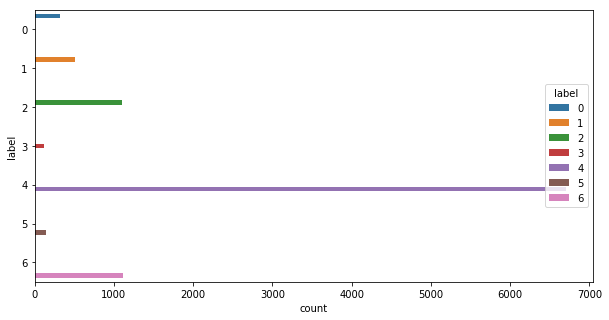

In [37]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
sns.countplot(y='label',data=data, hue="label",ax=ax1)

# Importing metadata

Cases include a representative collection of all important diagnostic categories in the realm of pigmented lesions: Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec), basal cell carcinoma (bcc), benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl), dermatofibroma (df), melanoma (mel), melanocytic nevi (nv) and vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc).

More than 50% of lesions are confirmed through histopathology (histo), the ground truth for the rest of the cases is either follow-up examination (followup), expert consensus (consensus), or confirmation by in-vivo confocal microscopy (confocal). 

In [38]:
metadata = pd.read_csv('C:\\Users\\GERMAN\\Documents\\bilkent 4\\spring\\math 465 data science\\project\\dataset\\data\\datasets_54339_104884_HAM10000_metadata.csv')

In [39]:
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


Dropping the label column from the data

In [40]:
Y = data['label']
data.drop('label',axis=1,inplace=True)
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,...,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,...,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,...,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,...,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,...,201,209,166,185,172,135,149,109,78,92


Label encoding. We have 7 classes for classification.

In [41]:
Y = to_categorical(Y,num_classes=7)

Splitting data to training data and testing data.

In [96]:
from sklearn.model_selection import train_test_split
# Test_size should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split
# if you use random_state=some_number, then you can guarantee that the output of Run 1 will be equal to the output of Run 2,
# i.e. your split will be always the same.
X_train,X_test,Y_train,Y_test = train_test_split(data,Y,test_size=0.2,random_state=42)

#### TODO: Oversampling minority classes to have a more balanced data.

In [49]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 8012
number of test examples = 2003
X_train shape: (8012, 2352)
Y_train shape: (8012, 7)
X_test shape: (2003, 2352)
Y_test shape: (2003, 7)


Reshaping to X_train and X_test to 3D arrays

In [50]:
X_train = X_train.values
X_train = np.reshape(X_train, (X_train.shape[0], 28, 28, 3))

X_test = X_test.values
X_test = np.reshape(X_test, (X_test.shape[0], 28, 28, 3))

print ("X_train shape: " + str(X_train.shape))
print ("X_test shape: " + str(X_test.shape))

X_train shape: (8012, 28, 28, 3)
X_test shape: (2003, 28, 28, 3)


Padding the X_train and X_test image arrays with zeros so that it becomes an image array of size 32x32x3, because this is the size of the minimum input of ResNet model.

In [51]:
hpad = np.zeros(( 28, 2 , 3))
vpad = np.zeros(( 2, 32, 3))

In [52]:
#im = np.asarray([np.pad(x, (2,), 'constant', constant_values=(0 ,)) for x in X_train])
X_train = np.asarray([np.hstack((hpad, x, hpad)) for x in X_train])
X_train = np.asarray([np.vstack((vpad, x, vpad)) for x in X_train])

In [53]:
print(str(X_train.shape))

(8012, 32, 32, 3)


In [54]:
X_test = np.asarray([np.hstack((hpad, x, hpad)) for x in X_test])
X_test = np.asarray([np.vstack((vpad, x, vpad)) for x in X_test])
print(str(X_test.shape))

(2003, 32, 32, 3)


# RESNET-50

Import the ResNet model for leraning. Here weights=None since we want to initialize the model with random weights, otherwise we can also load the pretrained ImageNet weights. I set include_top=False to not include the final pooling and fully connected layer in the original model. We add Global Average Pooling and a dense output layer to the ResNet-50 model.

In [54]:
img_height,img_width = 32,32 
num_classes = 7

In [55]:
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (img_height,img_width,3))

C:\Users\GERMAN\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [56]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

We use Adam optimizer,learning rate= 0.001 and 'categorical crossentropy' loss function. 

In [57]:
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

TODO: Image preprocessing

In [60]:
model.fit(X_train, Y_train, epochs = 20, batch_size = 64)

Epoch 1/20
8012/8012 [==============================] - 506s 63ms/step - loss: 2.0375 - accuracy: 0.5814
Epoch 2/20
8012/8012 [==============================] - 672s 84ms/step - loss: 1.8237 - accuracy: 0.5990
Epoch 3/20
8012/8012 [==============================] - 675s 84ms/step - loss: 1.5894 - accuracy: 0.6147
Epoch 4/20
8012/8012 [==============================] - 645s 81ms/step - loss: 1.4102 - accuracy: 0.6453
Epoch 5/20
8012/8012 [==============================] - 646s 81ms/step - loss: 1.2895 - accuracy: 0.6513
Epoch 6/20
8012/8012 [==============================] - 496s 62ms/step - loss: 1.1778 - accuracy: 0.6625
Epoch 7/20
8012/8012 [==============================] - 504s 63ms/step - loss: 1.1205 - accuracy: 0.6742
Epoch 8/20
8012/8012 [==============================] - 521s 65ms/step - loss: 1.0342 - accuracy: 0.7006
Epoch 9/20
8012/8012 [==============================] - 540s 67ms/step - loss: 0.9458 - accuracy: 0.7079
Epoch 10/20
8012/8012 [==============================] 

Test model on the test set.

In [61]:
preds = model.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2003/2003 [==============================] - 17s 8ms/step
Loss = 1.3395994774889364
Test Accuracy = 0.6989516019821167


Plot the confusion matrix

In [74]:
#Confusion Matrix 
y_pred = model.predict(X_test)
matrix = metrics.confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))

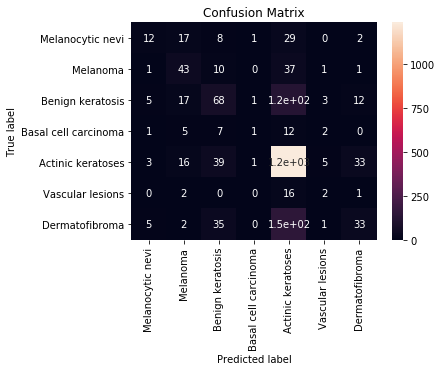

In [89]:
#print(np.matrix(matrix))

cm_df = pd.DataFrame(matrix,
                     index = ['Melanocytic nevi','Melanoma','Benign keratosis', 'Basal cell carcinoma','Actinic keratoses','Vascular lesions', 'Dermatofibroma'], 
                     columns = ['Melanocytic nevi','Melanoma','Benign keratosis', 'Basal cell carcinoma','Actinic keratoses','Vascular lesions', 'Dermatofibroma'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix'); 
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


#ANOTHER WAY TO DO IT
# import seaborn as sns
# import matplotlib.pyplot as plt     

# ax= plt.subplot()
# sns.heatmap(matrix, annot=True, ax = ax); #annot=True to annotate cells

# # labels, title and ticks
# ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
# ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);

# Convolutional Neural Network

In [80]:
# Set CNN model
# Our system of layers => [[Conv2D -> relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
input_shape = (32, 32, 3)
num_classes = 7


model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', padding = 'Same', input_shape = input_shape))
model_cnn.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', padding = 'Same'))
model_cnn.add(MaxPool2D(pool_size = (2, 2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'Same'))
model_cnn.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'Same'))
model_cnn.add(MaxPool2D(pool_size = (2, 2)))
model_cnn.add(Dropout(0.40))

model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(num_classes, activation='softmax'))
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

In [81]:
# Define the optimizer
optimizer = Adam(lr = .001)

In [82]:
# Compile the model
model_cnn.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [83]:
# Set learning rate annealer
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, 
                                           factor = 0.5, min_lr = 0.00001)

In [78]:
# Data Preproccessing
datagen = ImageDataGenerator(featurewise_center = False, samplewise_center = False,
                            featurewise_std_normalization = False, samplewise_std_normalization = False, 
                            zca_whitening = False, rotation_range = 10, zoom_range = 0.1, 
                            width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = False, 
                            vertical_flip = False)
datagen.fit(X_train)

In [79]:
#Training model with preprocessing and and learning rate reduction
epochs = 20
batch_size = 64
history = model_cnn.fit_generator(datagen.flow(X_train, Y_train, batch_size = batch_size), 
                             epochs = epochs, verbose = 1, steps_per_epoch = X_train.shape[0] // batch_size,
                             callbacks = [learning_rate_reduction])

Epoch 1/20
125/125 [==============================] - 52s 419ms/step - loss: 1.8853 - accuracy: 0.6448
Epoch 2/20


C:\Users\GERMAN\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


125/125 [==============================] - 53s 420ms/step - loss: 1.0065 - accuracy: 0.6704
Epoch 3/20
125/125 [==============================] - 50s 403ms/step - loss: 0.9722 - accuracy: 0.6677
Epoch 4/20
125/125 [==============================] - 50s 402ms/step - loss: 0.9373 - accuracy: 0.6741
Epoch 5/20
125/125 [==============================] - 50s 401ms/step - loss: 0.9397 - accuracy: 0.6694
Epoch 6/20
125/125 [==============================] - 50s 402ms/step - loss: 0.9238 - accuracy: 0.6735
Epoch 7/20
125/125 [==============================] - 51s 406ms/step - loss: 0.9114 - accuracy: 0.6707
Epoch 8/20
125/125 [==============================] - 50s 404ms/step - loss: 0.9013 - accuracy: 0.6760
Epoch 9/20
125/125 [==============================] - 51s 407ms/step - loss: 0.8764 - accuracy: 0.6828
Epoch 10/20
125/125 [==============================] - 51s 404ms/step - loss: 0.8806 - accuracy: 0.6774
Epoch 11/20
125/125 [==============================] - 50s 402ms/step - loss: 0.883

In [84]:
#Training model without preprocessing and learning rae reduction
model_cnn.fit(X_train, Y_train, epochs = 20, batch_size = 64)

Epoch 1/20
8012/8012 [==============================] - 28s 3ms/step - loss: 2.4761 - accuracy: 0.6459
Epoch 2/20
8012/8012 [==============================] - 28s 4ms/step - loss: 1.0290 - accuracy: 0.6670
Epoch 3/20
8012/8012 [==============================] - 30s 4ms/step - loss: 0.9686 - accuracy: 0.6679
Epoch 4/20
8012/8012 [==============================] - 30s 4ms/step - loss: 0.9414 - accuracy: 0.6696
Epoch 5/20
8012/8012 [==============================] - 35s 4ms/step - loss: 0.9273 - accuracy: 0.6689
Epoch 6/20
8012/8012 [==============================] - 32s 4ms/step - loss: 0.9046 - accuracy: 0.6735
Epoch 7/20
8012/8012 [==============================] - 31s 4ms/step - loss: 0.8765 - accuracy: 0.6777
Epoch 8/20
8012/8012 [==============================] - 36s 4ms/step - loss: 0.8681 - accuracy: 0.6826
Epoch 9/20
8012/8012 [==============================] - 35s 4ms/step - loss: 0.8531 - accuracy: 0.6870
Epoch 10/20
8012/8012 [==============================] - 32s 4ms/step - l

# Random Forest

In [93]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(X_train, Y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
           n_jobs=-1)

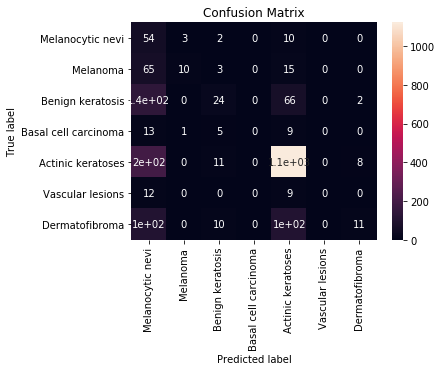

In [94]:
#Confusion Matrix 
y_pred = multi_target_forest.predict(X_test)
matrix = metrics.confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))

cm_df = pd.DataFrame(matrix,
                     index = ['Melanocytic nevi','Melanoma','Benign keratosis', 'Basal cell carcinoma','Actinic keratoses','Vascular lesions', 'Dermatofibroma'], 
                     columns = ['Melanocytic nevi','Melanoma','Benign keratosis', 'Basal cell carcinoma','Actinic keratoses','Vascular lesions', 'Dermatofibroma'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix'); 
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# SVM

In [98]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

clf = OneVsRestClassifier(LinearSVC())
clf.fit(X_train, Y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1)

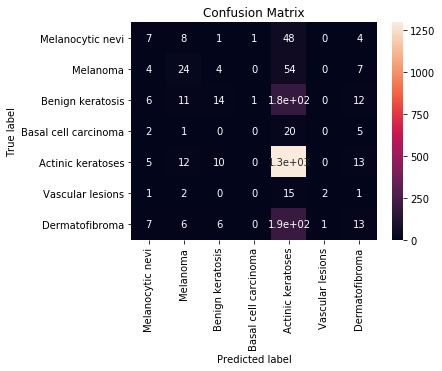

In [99]:
#Confusion Matrix 
y_pred = clf.predict(X_test)
matrix = metrics.confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))

cm_df = pd.DataFrame(matrix,
                     index = ['Melanocytic nevi','Melanoma','Benign keratosis', 'Basal cell carcinoma','Actinic keratoses','Vascular lesions', 'Dermatofibroma'], 
                     columns = ['Melanocytic nevi','Melanoma','Benign keratosis', 'Basal cell carcinoma','Actinic keratoses','Vascular lesions', 'Dermatofibroma'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix'); 
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


TODO: Analysis of accuracies for various classifiers